To begin with, the neccesary packages are imported

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn


%matplotlib inline

Next, the data is read into a pandas dataframe

In [3]:
df = pd.read_csv("../data/player_stats-27-01-2023.csv")
print(f"Data Shape is {df.shape}")
df.sample(10)

Data Shape is (67, 16)


,player,overall_kd,hp_kills_per_10,hp_kd,hp_dmg_per_10,avg_hp_hill_time,hp_maps_played,snd_kill_per_round,snd_kd_rate,snd_first_blood_rate,snd_maps_played,control_kills_per_10,control_kd,control_dmg_per_10,control_maps_played,map_1_3_average_kills
36,SlasheR,0.97,19.8,0.94,2436,53.6,22,0.59,0.94,9.90%,18,17.0,1.04,2221,13,46.0
51,CleanX,0.92,21.8,0.92,2698,51.2,25,0.65,0.92,15.30%,17,16.6,0.93,2129,14,47.9
25,Shotzzy,1.01,22.4,0.99,2703,44.5,18,0.70,0.97,20.00%,15,19.1,1.06,2247,10,53.4
31,Zer0,0.99,19.4,0.97,2370,58.0,13,0.57,0.85,8.90%,12,15.6,1.08,2008,8,44.6
57,Vikul,0.89,20.3,0.88,2522,62.4,22,0.70,1.06,12.20%,16,15.5,0.84,1958,12,47.3
5,Pred,1.13,24.3,1.17,2833,41.7,24,0.75,0.98,18.20%,19,20.0,1.13,2286,14,57.1
60,Exceed,0.86,20.6,0.94,2368,60.2,11,0.63,0.87,13.20%,9,15.8,0.72,2102,6,46.5
45,Vivid,0.94,23.4,0.94,2760,52.4,17,0.70,0.95,18.00%,13,20.2,0.95,2475,9,50.9
11,Temp,1.10,22.4,1.07,2916,36.0,25,0.77,1.23,11.10%,19,19.7,1.12,2389,13,50.9
14,Priestahh,1.09,22.1,1.15,2615,49.8,26,0.65,0.94,9.70%,19,17.3,1.02,2294,15,46.2


Next, I will check the data for any nulls

In [4]:
print(f"There are {df.isna().sum().sum()} nulls in the dataset")

There are 0 nulls in the dataset


Next I will look into the columns to understand the datatypes

In [5]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   player                 67 non-null     object 
 1   overall_kd             67 non-null     float64
 2   hp_kills_per_10        67 non-null     float64
 3   hp_kd                  67 non-null     float64
 4   hp_dmg_per_10          67 non-null     int64  
 5   avg_hp_hill_time       67 non-null     float64
 6   hp_maps_played         67 non-null     int64  
 7   snd_kill_per_round     67 non-null     float64
 8   snd_kd_rate            67 non-null     float64
 9   snd_first_blood_rate   67 non-null     object 
 10  snd_maps_played        67 non-null     int64  
 11  control_kills_per_10   67 non-null     float64
 12  control_kd             67 non-null     float64
 13  control_dmg_per_10     67 non-null     int64  
 14  control_maps_played    67 non-null     int64  
 15  map_1_3_

After establishing that `'snd_first_blood_rate'` is of the 'object' datatype (often used to represent strings in numpy arrays),
I have learnt that I need to remove the % symbols from the end of the floating point number


In [6]:
df['snd_first_blood_rate'] = df['snd_first_blood_rate'].astype('string')
df['snd_first_blood_rate'] = df['snd_first_blood_rate'].str.replace('%', '', regex=True)
df['snd_first_blood_rate'] = df['snd_first_blood_rate'].astype("float")

print(f"An example of a value in the columns snd_first_blood_rate is {df['snd_first_blood_rate'][1]}");
print(f"The datatype of the column is now '{df['snd_first_blood_rate'].dtype}'")

An example of a value in the columns snd_first_blood_rate is 13.6
The datatype of the column is now 'float64'


In [7]:
print(f"The datsets columns are {df.columns.values}")

The datsets columns are ['player' 'overall_kd' 'hp_kills_per_10' 'hp_kd' 'hp_dmg_per_10'
 'avg_hp_hill_time' 'hp_maps_played' 'snd_kill_per_round' 'snd_kd_rate'
 'snd_first_blood_rate' 'snd_maps_played' 'control_kills_per_10'
 'control_kd' 'control_dmg_per_10' 'control_maps_played'
 'map_1_3_average_kills']


It is useful to remove players who have a small number of maps played as it isn't a strong representation
of long term performance

In [8]:
df['hp_maps_played'].value_counts().sort_index(ascending=True)

2      6
4      4
5      1
6      5
11     5
13     2
14     1
15     1
16     3
17     5
18     2
21     1
22    12
23     3
24     4
25     8
26     4
Name: hp_maps_played, dtype: int64

After looking at the data for matches played in hardpoints, I have decided to remove anyone with less than 10 maps played in hardpoint.
This is being done under the assumption that players will still have a decent number of maps played in other gamemodes

In [9]:
df = df[df['hp_maps_played'] >= 10]
df.reset_index(drop=True, inplace=True)
df['hp_maps_played'].value_counts().sort_index(ascending=True)

11     5
13     2
14     1
15     1
16     3
17     5
18     2
21     1
22    12
23     3
24     4
25     8
26     4
Name: hp_maps_played, dtype: int64

In [10]:
df['snd_maps_played'].value_counts().sort_index(ascending=True)

9      5
11     2
12     2
13     6
14     3
15     9
16     4
17     4
18     4
19    12
Name: snd_maps_played, dtype: int64

In [11]:
df['control_maps_played'].value_counts().sort_index(ascending=True)

6      3
7      2
8      4
9      4
10     6
11     1
12     4
13    15
14     8
15     4
Name: control_maps_played, dtype: int64

After removing players with <10 hardpoint maps played, the minimum number of maps played in one gamemode is 6 (control)

In [12]:
df[df['control_maps_played'] < 7]

,player,overall_kd,hp_kills_per_10,hp_kd,hp_dmg_per_10,avg_hp_hill_time,hp_maps_played,snd_kill_per_round,snd_kd_rate,snd_first_blood_rate,snd_maps_played,control_kills_per_10,control_kd,control_dmg_per_10,control_maps_played,map_1_3_average_kills
39,JoeDeceives,0.93,22.1,1.03,2605,86.5,11,0.57,0.78,13.2,9,16.7,0.83,2113,6,49.3
42,Assault,0.92,17.7,0.88,2374,55.9,11,0.82,1.35,11.8,9,14.3,0.83,1933,6,43.2
48,Exceed,0.86,20.6,0.94,2368,60.2,11,0.63,0.87,13.2,9,15.8,0.72,2102,6,46.5


These appear to be players who have recently been added to the LAG roster, after being promoted from the academy team (recent as of 27/01/2023)
I feel like they haven't played 6 control maps as they haven't played 6 series in stage 2???
This inaccuracy may be a result of challengers stats being counted. To increase the depth of the data however, they will still be included

To determine if my scaled data is accuracte in showing that a player is high in both categories, I need to look at the raw data

In [13]:
df['scaled'] = ((df['hp_kills_per_10']/df['hp_kills_per_10'].mean())+(df['avg_hp_hill_time']/df['avg_hp_hill_time'].mean()))/2
df[['player', 'hp_kills_per_10', 'avg_hp_hill_time', 'scaled']].sort_values(by='scaled').style.background_gradient(cmap='coolwarm')

,player,hp_kills_per_10,avg_hp_hill_time,scaled
34,MajorManiak,17.700000,44.100000,0.782170
49,Neptune,20.500000,37.800000,0.796338
9,Temp,22.400000,36.000000,0.826378
38,Havok,19.500000,44.500000,0.828003
26,Arcitys,20.400000,44.800000,0.851744
0,Cellium,21.500000,43.000000,0.862881
42,Assault,17.700000,55.900000,0.879552
40,Kenny,21.400000,45.600000,0.881975
16,Asim,24.200000,38.300000,0.887891
47,Clayster,20.700000,49.200000,0.895145


Looking at this, it is clear that the scaled data is succesfuly determining what players have a high average between both statlines.
Some outcomes include:
- Accuracy has low kills per ten minutes but makes up for it in hill time
- JoeDeceives has the highest 'impact' in terms of having high hill time and kills per ten minutes
- MajorManiak has the lowest, with low kills per ten minutes and lower hill time


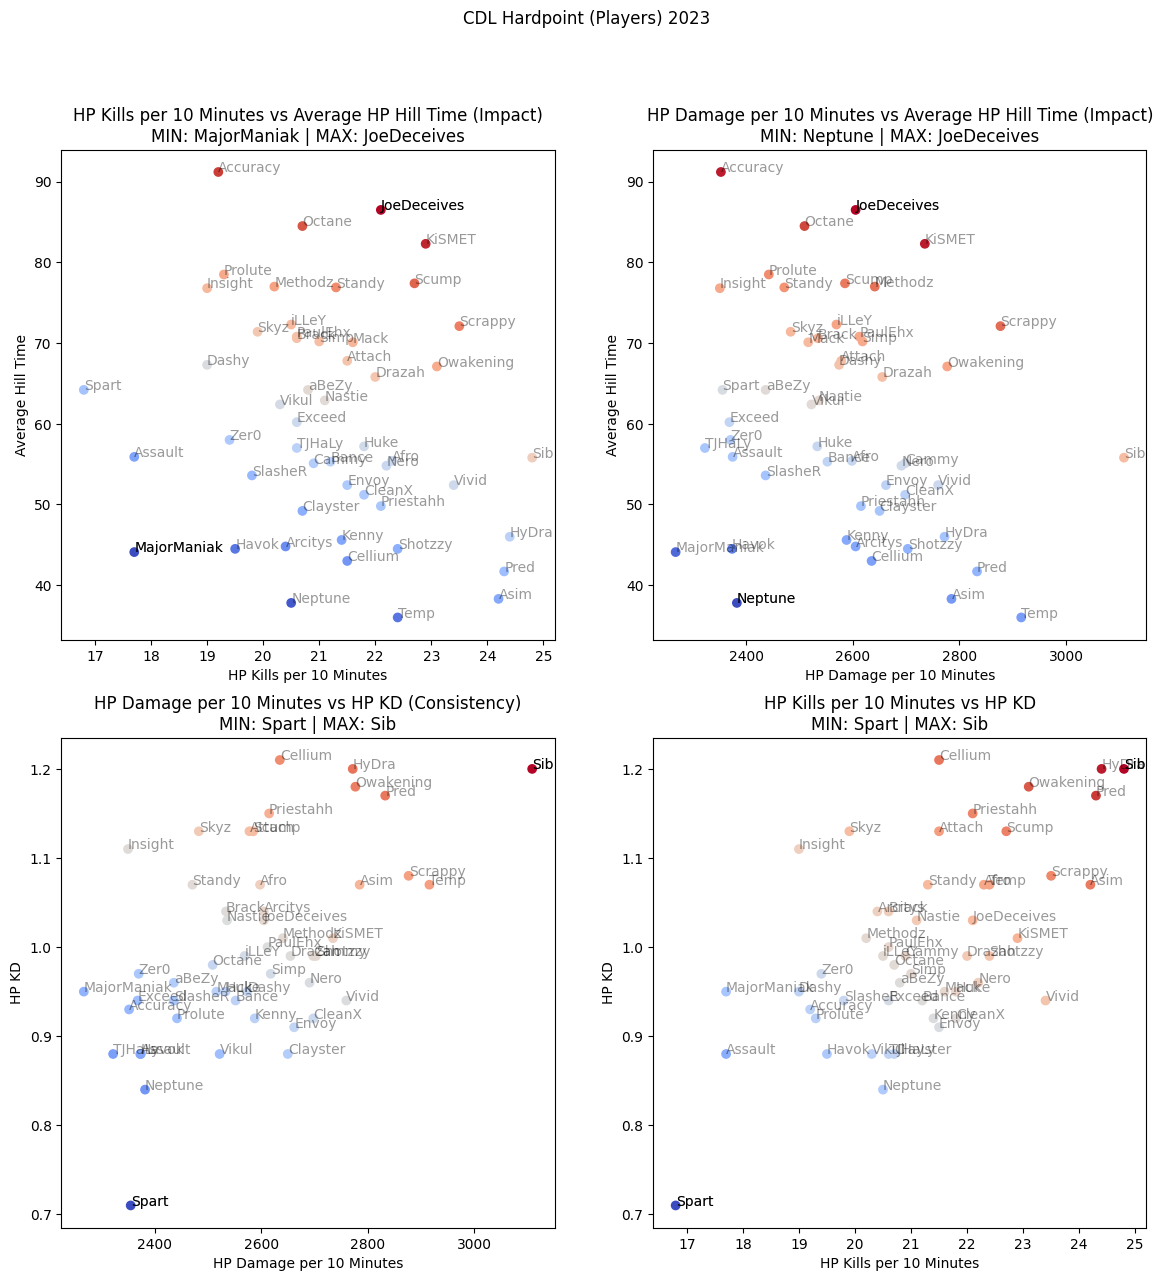

In [14]:
#Create function to plot scatter graphs comparing two numerical columns
#It weight them by multiplying both columns
#This leads to higher values being red and lower columns being blue
#Colours don't neccesarily correlate to good or bad
#This is dependent on the data in the inputted columns

def scatter_comparison(axis: plt.Axes, title: str , xcol: str, ycol: str, xlabel: str, ylabel: str,
    show_min_max: bool = True, player_col: np.array = None, show_all_players: bool = False):
    """
    Desc: This function plots two columns from the data into
          a scatter plot on the axis provided
    Params:
        axis: the axis to draw the plot on
        title: The title of the plot
        xcol: the column to use as the x values in the plot
        ycol: the column to use for y values
        xlabel:
        ylabel:
        show_min_max: whether or not to plot the player names of the min and max players (from scaled data)
        player_col: column containing player names
    Return: None
    """
    #Scale the data
    #The scale is based on what percentage of the mean value a value makes up
    #This is then averaged between the two datapoints
    scaled_weight = ((xcol/xcol.mean())+(ycol/ycol.mean()))/2
    axis.scatter(x=xcol, y=ycol, c=scaled_weight, cmap='coolwarm')
    axis.set_title(f"{title}\nMIN: {player_col[(scaled_weight).argmin()]} | MAX: {player_col[(scaled_weight).argmax()]}")
    axis.set_xlabel(xlabel)
    axis.set_ylabel(ylabel)
    if show_all_players:
        for i in range(len(player_col)):
            axis.text(x=xcol[i], y=ycol[i], s=player_col[i], alpha=0.4)
        min_player_index = (scaled_weight).argmin()
        min_player = player_col[min_player_index]
        axis.text(s=min_player, x=xcol[min_player_index], y=ycol[min_player_index])

        max_player_index = (scaled_weight).argmax()
        max_player = player_col[max_player_index]
        axis.text(s=max_player, x=xcol[max_player_index], y=ycol[max_player_index])

fig = plt.figure(figsize=(14, 14))
plt.suptitle("CDL Hardpoint (Players) 2023")
((ax1, ax2), (ax3, ax4)) = fig.subplots(ncols=2, nrows=2, sharey=False)


#Some example plots to test the func
scatter_comparison(ax1, "HP Kills per 10 Minutes vs Average HP Hill Time (Impact)", df['hp_kills_per_10'], df['avg_hp_hill_time'],
                "HP Kills per 10 Minutes", "Average Hill Time", False, df['player'], True)

scatter_comparison(ax2, "HP Damage per 10 Minutes vs Average HP Hill Time (Impact)", df['hp_dmg_per_10'], df['avg_hp_hill_time'],
                "HP Damage per 10 Minutes", "Average Hill Time", False, df['player'], True)

scatter_comparison(ax3, "HP Damage per 10 Minutes vs HP KD (Consistency)", df['hp_dmg_per_10'], df['hp_kd'],
                "HP Damage per 10 Minutes", "HP KD", False, df['player'], True)

scatter_comparison(ax4, "HP Kills per 10 Minutes vs HP KD", df['hp_kills_per_10'], df['hp_kd'],
                "HP Kills per 10 Minutes", "HP KD", False, df['player'], True)

After looking at some examples of hardpoint, I have decided to look at some SND examples.
Data I've decided to plot includes:
- SND first blood rate vs SND KD
- SND kill per round vs SND KD (Should positively correlate)
- SND KD vs Average Respawn KD (Should highlight players who excel in certain gamemodes)

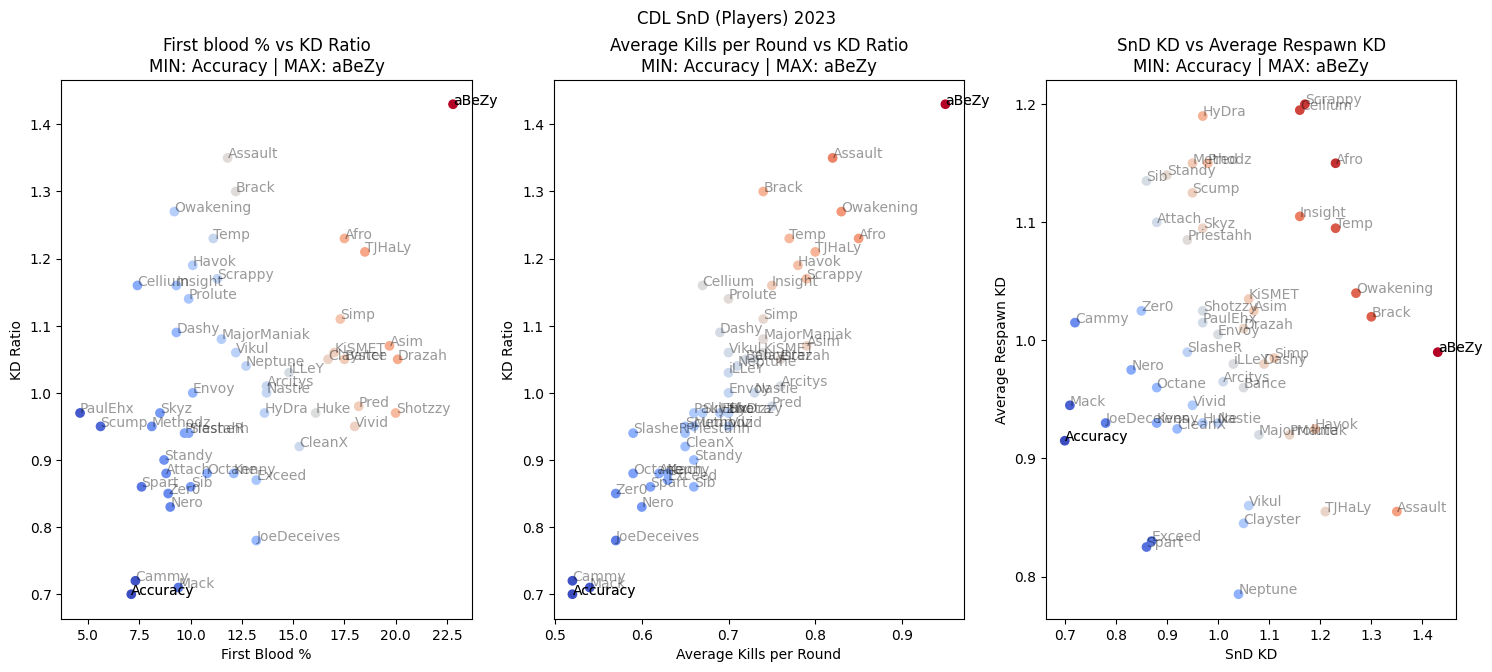

In [15]:
#Create a new figure with 3 columns
fig = plt.figure(figsize=(18, 7))
(ax1, ax2, ax3) = fig.subplots(ncols=3)
fig.suptitle("CDL SnD (Players) 2023")

#not really sure why the columns called snd_kd_rate, should be kd_ratio or just snd_kd
scatter_comparison(ax1, "First blood % vs KD Ratio", df['snd_first_blood_rate'], df['snd_kd_rate'], 
                    "First Blood %", "KD Ratio", True, df['player'], True)

scatter_comparison(ax2, "Average Kills per Round vs KD Ratio", df['snd_kill_per_round'], df['snd_kd_rate'],
                     "Average Kills per Round", "KD Ratio", True, df['player'], True)

respawn_average_kd = (df['control_kd']+df['hp_kd'])/2
scatter_comparison(ax3, "SnD KD vs Average Respawn KD", df['snd_kd_rate'], respawn_average_kd, 
                    "SnD KD", "Average Respawn KD", True, df['player'], True)

Before adding a line for the league average onto the plots, I must first decide whether to use the mean or the median.
To do this, I will plot the distributions for some columns in the df

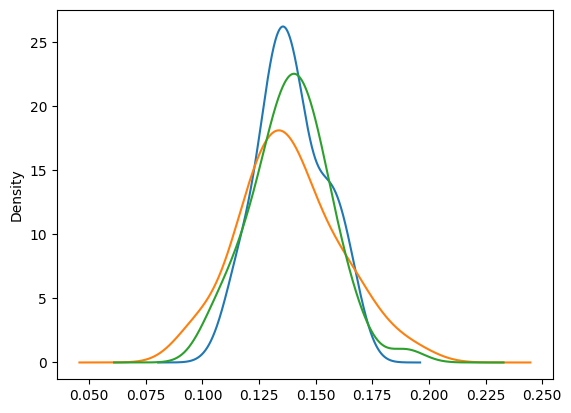

In [16]:
from sklearn.preprocessing import normalize

#Normalize the data so that it can be plotted on one graph and the distributions can be compared
av_kd_norm = normalize(np.array([respawn_average_kd]))
snd_kd_norm = normalize(np.array([df['snd_kd_rate']]))
snd_kill_per_round_norm = normalize(np.array([df['snd_kill_per_round']]))

#Plot the distributions
pd.Series(av_kd_norm[0]).plot.density()
pd.Series(snd_kd_norm[0]).plot.density()
pd.Series(snd_kill_per_round_norm[0]).plot.density();

From this plot, we can see that the distribution is mostly symmetrical and not too skewed.
This indicates that the mean can be used as an 'average' rather than a median

In [17]:
#While this is bad practice, and could be inserted into the scatter_comparison function, 
#I will create a new function to place the average onto the plots.
#I have decided to create a new function for the flow of the notebook
def show_average(axis: plt.Axes, y_data, x_data):
    """
    Desc: This function plots lines indicating the league average.
          This allows for players who are below the league average to be identified.
    Params:
        axis: The ax for the average to be drawn onto
        x_data:
        y_data:
    Return:
        None
    """
    y_min = axis.get_ylim()[0]
    x_mean = x_data.mean()
    y_mean = y_data.mean()
    x_min = axis.get_xlim()[0]

    axis.set_ylim(y_min)
    axis.set_xlim(x_min)

    axis.plot([x_mean, x_mean], [y_min, y_mean], color='green', linestyle='dashed', label='League Average')
    axis.plot([x_min, x_mean], [y_mean, y_mean], color='green', linestyle='dashed')
    axis.legend()



Now that our function has been created, we can re-plot the original SnD data but this time with the league average drawn on

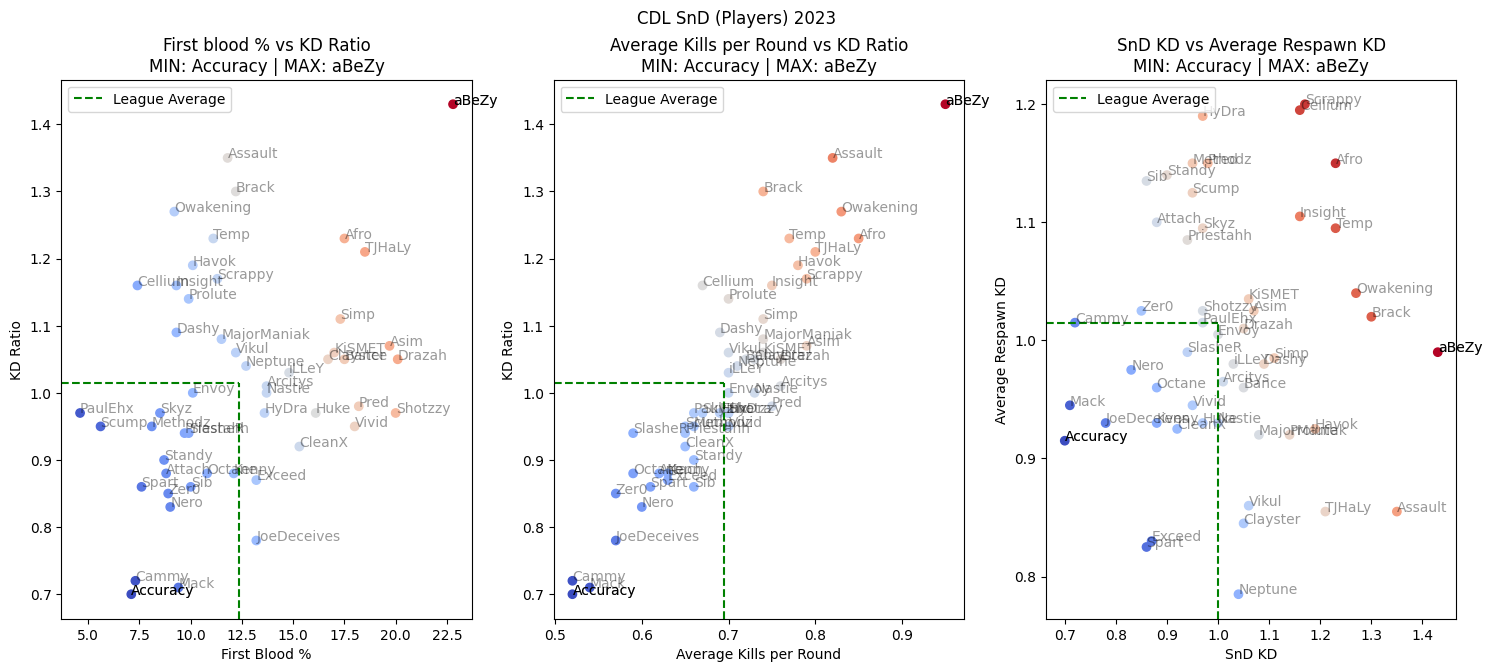

In [18]:
#Once again, this is repeated code.
#This has however been left in for the continuity of the notebook
fig = plt.figure(figsize=(18, 7))
(ax1, ax2, ax3) = fig.subplots(ncols=3)
fig.suptitle("CDL SnD (Players) 2023")

scatter_comparison(ax1, "First blood % vs KD Ratio", df['snd_first_blood_rate'], df['snd_kd_rate'], 
                    "First Blood %", "KD Ratio", True, df['player'], True)

scatter_comparison(ax2, "Average Kills per Round vs KD Ratio", df['snd_kill_per_round'], df['snd_kd_rate'],
                     "Average Kills per Round", "KD Ratio", True, df['player'], True)

respawn_average_kd = (df['control_kd']+df['hp_kd'])/2
scatter_comparison(ax3, "SnD KD vs Average Respawn KD", df['snd_kd_rate'], respawn_average_kd, 
                    "SnD KD", "Average Respawn KD", True, df['player'], True)

show_average(ax1,  df['snd_kd_rate'], df['snd_first_blood_rate'])
show_average(ax2, df['snd_kd_rate'], df['snd_kill_per_round'])
show_average(ax3,  df['snd_kd_rate'], respawn_average_kd)
